<a href="https://colab.research.google.com/github/Larissaanzolin/Larissaanzolin/blob/main/Tarefa5_Controle2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install control

In [ ]:
import control.matlab as ctl
import matplotlib.pyplot as plt
import numpy as np
import math as math



  287.9
----------
3.45 s + 1



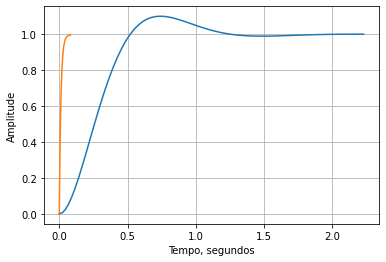

In [ ]:
num= [287.9]
dem = [3.45,1]
G = ctl.tf(num,dem)
print(G)

wn = 5.25
zeta = 0.59

F = ctl.tf([wn**2],[1,2*zeta*wn, wn**2])
y, t = ctl.step(F)
plt.plot(t,y)
plt.xlabel('Tempo, segundos')
plt.ylabel('Amplitude')

T = ctl.feedback(G, sign=-1)
y, t = ctl.step(T)

plt.plot(t,y)
plt.grid()


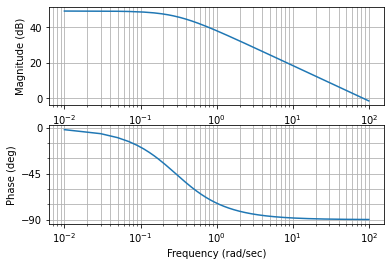

In [ ]:
omega = np.linspace(1e-2,1e2,5000)
mag, phase, omega = ctl.bode(G,omega)

In [ ]:
Mp = 10/100
zeta =(-np.log(Mp))/np.sqrt(np.pi**2 + (np.log(Mp))**2)
ts = 1.5
wbw = 4*np.sqrt((1-2*zeta**2)+np.sqrt(4*zeta**4 - 4*zeta**2 + 2))/(ts*zeta)
wc = wbw
mf = math.atan(2*zeta/np.sqrt(-2*zeta**2 + np.sqrt(4*zeta**4 + 1)))
mf = mf * 180/np.pi

print('Zeta =',zeta)
print('Margem de fase =',mf,'graus')
print('wc =',wc,'rad/s ')

Zeta = 0.5911550337988976
Margem de fase = 58.59306826496366 graus
wc = 5.232325392452245 rad/s 


In [ ]:

s = 1j*wc;

thetac =(mf - 180)*np.pi/180
modFTMAwc = np.abs(ctl.evalfr(G,s))
#modFTMAwc = modFTMAwc[0,0]
faseFTMAwc = np.angle(ctl.evalfr(G,s))
#faseFTMAwc = faseFTMAwc[0,0]

print('|G(wc)| =',20*np.log10(np.abs(ctl.evalfr(G,s))))
print('fase G(wc) =',180*np.angle(ctl.evalfr(G,s))/np.pi)
z = wc/np.tan(thetac+(np.pi/2)-faseFTMAwc)
k = wc/(modFTMAwc*np.sqrt((z**2)+(wc**2)))
print('Z =',z)
print('K =',k)

PI=ctl.tf([k,k*z],[1,0])
print('PI(S)=',PI)

|G(wc)| = 24.04124917206041
fase G(wc) = -86.8292271967947
Z = 3.6065353149012904
K = 0.05170420518202204
PI(S)= 
0.0517 s + 0.1865
-----------------
        s



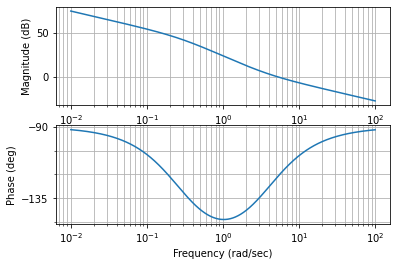

In [ ]:
Comp = ctl.series(G,PI)
magComp, phaseComp, omegaComp = ctl.bode(Comp)
magComp = 20*np.log10(magComp)
phaseComp = 180*phaseComp/np.pi

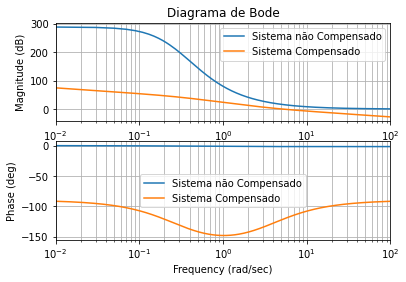

In [ ]:
plt.figure()

plt.subplot(211)
plt.title('Diagrama de Bode')
plt.semilogx(omega,mag,label='Sistema não Compensado')
plt.semilogx(omegaComp,magComp,label='Sistema Compensado')
plt.xlim(0.01,100)
plt.legend(loc='best')
plt.xlabel('Frequency (rad/sec)')
plt.ylabel('Magnitude (dB)')
plt.grid(which="both")

plt.subplot(212)
plt.semilogx(omega,phase,label='Sistema não Compensado')
plt.semilogx(omegaComp,phaseComp,label='Sistema Compensado')
plt.xlim(0.01,100)
plt.legend(loc='best')
plt.xlabel('Frequency (rad/sec)')
plt.ylabel('Phase (deg)')
plt.grid(which="both")

plt.show()